Number of nodes: 9
Number of elements: 4
Number of equations: 14
Duration for system solution: 0:00:00.080328


/home/il1/anaconda3/envs/intro_fem/lib/python3.9/site-packages/solidspy/postprocesor.py:108: UserWarning: The following kwargs were not used by contour: 'shading'
  disp_plot(tri, field, levels, shading="gouraud")


Duration for post processing: 0:00:00.191287
Analysis terminated successfully!


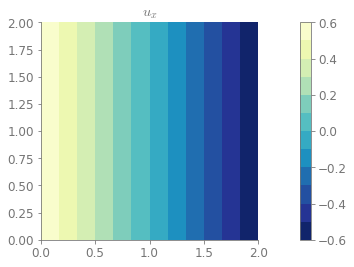

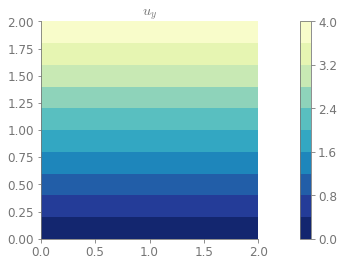

In [1]:
import matplotlib.pyplot as plt  # load matplotlib
from solidspy import solids_GUI  # import our package
disp = solids_GUI()  # run the Finite Element Analysis
plt.show()    # plot contours

Number of nodes: 9
Number of elements: 4
Number of equations: 14
Duration for system solution: 0:00:00.030502
Duration for post processing: 0:00:00.136590
Analysis terminated successfully!


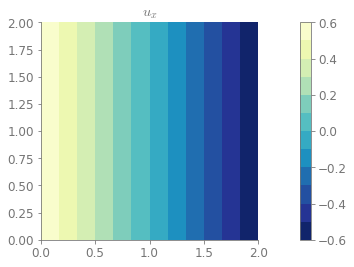

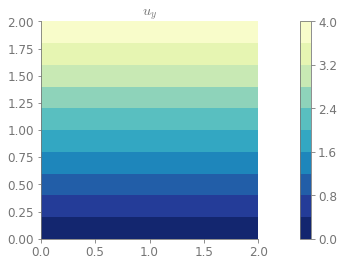

In [2]:
UC = solids_GUI()

In [4]:
import meshio
import numpy as np

mesh = meshio.read("g.msh")
points = mesh.points
cells = mesh.cells
point_data = mesh.point_data
cell_data = mesh.cell_data

# Element data
eles = cells["triangle"]
els_array = np.zeros([eles.shape[0], 6], dtype=int)
els_array[:, 0] = range(eles.shape[0])
els_array[:, 1] = 3
els_array[:, 3::] = eles

# Nodes
nodes_array = np.zeros([points.shape[0], 5])
nodes_array[:, 0] = range(points.shape[0])
nodes_array[:, 1:3] = points[:, :2]

# Boundaries
lines = cells["line"]
bounds = cell_data["line"]["gmsh:physical"]
nbounds = len(bounds)

# Loads
id_cargas = cells["vertex"]
nloads = len(id_cargas)
load = -10e8 # N/m
loads_array = np.zeros((nloads, 3))
loads_array[:, 0] = id_cargas
loads_array[:, 1] = 0
loads_array[:, 2] = load

# Boundary conditions
id_izq = [cont for cont in range(nbounds) if bounds[cont] == 1]
id_inf = [cont for cont in range(nbounds) if bounds[cont] == 2]
nodes_izq = lines[id_izq]
nodes_izq = nodes_izq.flatten()
nodes_inf = lines[id_inf]
nodes_inf = nodes_inf.flatten()
nodes_array[nodes_izq, 3] = -1
nodes_array[nodes_inf, 4] = -1

#  Materials
mater_array = np.array([[70e9, 0.35],
                        [70e9, 0.35]])
maters = cell_data["triangle"]["gmsh:physical"]
els_array[:, 2]  = [1 for mater in maters if mater == 4]

# Create files
np.savetxt("eles.txt", els_array, fmt="%d")
np.savetxt("nodes.txt", nodes_array,
           fmt=("%d", "%.4f", "%.4f", "%d", "%d"))
np.savetxt("loads.txt", loads_array, fmt=("%d", "%.6f", "%.6f"))
np.savetxt("mater.txt", mater_array, fmt="%.6f")

Number of nodes: 119
Number of elements: 200
Number of equations: 216
Duration for system solution: 0:00:00.143867
Duration for post processing: 0:00:00.112697
Analysis terminated successfully!


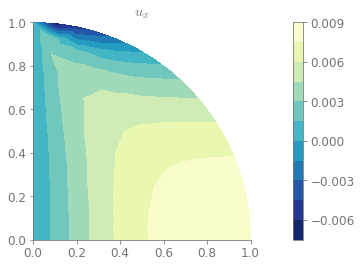

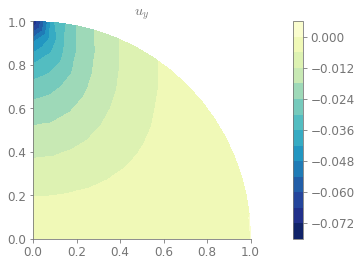

In [5]:
from solidspy import solids_GUI
disp = solids_GUI()